<a href="https://colab.research.google.com/github/rodrigotorresp/Practica-Regresi-n-ML/blob/main/PracpugaDAniSamu.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [118]:
import pandas as pd
train_dataframe3= pd.read_csv("https://raw.githubusercontent.com/rodrigotorresp/Practica-Regresi-n-ML/main/train.csv");
train_dataframe3

,LaptopId,Company,Product,TypeName,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price
0,981,Toshiba,Portege Z30-C-1CV,Notebook,13.3,Full HD 1920x1080,Intel Core i5 6200U 2.3GHz,4GB,128GB SSD,Intel HD Graphics 520,Windows 7,1.2kg,1195.00
1,996,HP,Spectre 13-V111dx,Ultrabook,13.3,IPS Panel Full HD / Touchscreen 1920x1080,Intel Core i7 7500U 2.7GHz,8GB,256GB SSD,Intel HD Graphics 620,Windows 10,1.11kg,1349.00
2,77,Dell,Inspiron 5570,Notebook,15.6,Full HD 1920x1080,Intel Core i7 8550U 1.8GHz,8GB,128GB SSD + 1TB HDD,Intel UHD Graphics 620,Windows 10,2.02kg,855.00
3,103,HP,Envy 13-ad009n,Ultrabook,13.3,IPS Panel Full HD 1920x1080,Intel Core i7 7500U 2.7GHz,8GB,256GB SSD,Nvidia GeForce MX150,Windows 10,1.38kg,1119.00
4,946,Dell,Latitude 7280,Ultrabook,12.5,Full HD / Touchscreen 1920x1080,Intel Core i5 7200U 2.5GHz,8GB,256GB SSD,Intel HD Graphics,Windows 10,1.36kg,1472.20
...,...,...,...,...,...,...,...,...,...,...,...,...,...
907,994,Dell,Inspiron 5378,2 in 1 Convertible,13.3,Full HD / Touchscreen 1920x1080,Intel Core i5 7200U 2.5GHz,8GB,256GB SSD,Intel HD Graphics 620,Windows 10,1.68kg,889.00
908,615,Asus,FX753VD-GC007T (i7-7700HQ/8GB/1TB,Gaming,17.3,Full HD 1920x1080,Intel Core i7 7700HQ 2.8GHz,8GB,128GB SSD + 1TB HDD,Nvidia GeForce GTX 1050,Windows 10,3kg,1168.00
909,1063,Dell,Inspiron 5567,Notebook,15.6,Full HD 1920x1080,Intel Core i7 7500U 2.7GHz,16GB,2TB HDD,AMD Radeon R7 M445,Windows 10,2.32kg,989.99
910,96,Dell,Inspiron 3567,Notebook,15.6,Full HD 1920x1080,Intel Core i7 7500U 2.7GHz,8GB,1TB HDD,AMD Radeon R5 M430,Linux,2.2kg,599.90


Uno de los problemas que existen con el tratamiento de estos datos es la existencia en algunas columnas de las medidas, es decir, cuando hablamos de peso el string "kg" está presente en todos los valores del dataset, de manera que es imprescindible eliminarlo de primeras

In [119]:
train_dataframe3['Weight'] = train_dataframe3['Weight'].str.replace('kg$', '')

train_dataframe3['CPU2'] = train_dataframe3['Cpu'].str.replace('\s', '-')
cpu = train_dataframe3['CPU2'].str.split('[-]',expand=True)

train_dataframe3=pd.concat([train_dataframe3, cpu], axis=1)

train_dataframe3['ScreenResolution2'] = train_dataframe3['ScreenResolution'].str.replace('\s', '@')
cpu = train_dataframe3['ScreenResolution2'].str.split('[@]',expand=True)

train_dataframe3=pd.concat([train_dataframe3,cpu], axis=1)

##memory = train_dataframe['Memory'].str.split(expand=True)
##memory.columns = ['SSD-Memory', 'SSD', '+', 'HDD', 'HDD-Memory']

##for i in train_dataframe:
##  if train_dataframe["Memory"]=='\*SSD\*':
 ##   train_dataframe['SSD'] = '1'
  
##train_dataframe['HDD'] = train_dataframe['Memory'].str.replace('.B HDD', '')

#No hemos conseguido nada, yujuuuh

##train_dataframe['SSD'] = train_dataframe['Memory'].str.replace('^\*SSD\*', '1')
##train_dataframe['SSD'] = train_dataframe['Memory'].replace({'Memory': r'^\*SSD\*.$'}, {'SSD': '1'}, regex=True)
##train_dataframe['ScreenResolution'] = train_dataframe['ScreenResolution'].replace(to_replace=r'Full HD', value='', regex=True)
##train_dataframe['ScreenResolution'] = train_dataframe['ScreenResolution'].replace(to_replace=r'IPS Panel', value='', regex=True)
##train_dataframe['ScreenResolution'] = train_dataframe['ScreenResolution'].replace(to_replace=r'/ Touchscreen', value='', regex=True)
##train_dataframe['ScreenResolution'] = train_dataframe['ScreenResolution'].replace(to_replace=r'\*Touchscreen\*', value='', regex=True)
##train_dataframe['ScreenResolution'] = train_dataframe['ScreenResolution'].replace(to_replace=r'/', value='', regex=True)
##train_dataframe['ScreenResolution'] = train_dataframe['ScreenResolution'].replace(to_replace=r'4K Ultra HD', value='', regex=True)
##train_dataframe['ScreenResolution'] = train_dataframe['ScreenResolution'].replace(to_replace=r'\*"+"\*', value='', regex=True)
##train_dataframe['ScreenResolution'] = train_dataframe['ScreenResolution'].replace(to_replace=r'Quad HD+', value='', regex=True)
##train_dataframe['ScreenResolution'] = train_dataframe['ScreenResolution'].replace(to_replace=r'\*Retina Display', value='', regex=True)
##La idea de esto es eliminar el texto y dejar solo el 1920x1080 o 2560 × 1440 o 4096 × 2160 para luego hacer un original encoder pero no furula
##Tenía pensado hacer algo parecido con la cpu pero viendo que no funciona como quiero xd




/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: FutureWarning: The default value of regex will change from True to False in a future version.
  """Entry point for launching an IPython kernel.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: FutureWarning: The default value of regex will change from True to False in a future version.
  This is separate from the ipykernel package so we can avoid doing imports until
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:8: FutureWarning: The default value of regex will change from True to False in a future version.
  


,LaptopId,Company,Product,TypeName,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,...,3,4,5,6,7,0,1,2,3,4
0,981,Toshiba,Portege Z30-C-1CV,Notebook,13.3,Full HD 1920x1080,Intel Core i5 6200U 2.3GHz,4GB,128GB SSD,Intel HD Graphics 520,...,None,None,None,None,None,Intel,HD,Graphics,520,None
1,996,HP,Spectre 13-V111dx,Ultrabook,13.3,IPS Panel Full HD / Touchscreen 1920x1080,Intel Core i7 7500U 2.7GHz,8GB,256GB SSD,Intel HD Graphics 620,...,HD,/,Touchscreen,1920x1080,None,Intel,HD,Graphics,620,None
2,77,Dell,Inspiron 5570,Notebook,15.6,Full HD 1920x1080,Intel Core i7 8550U 1.8GHz,8GB,128GB SSD + 1TB HDD,Intel UHD Graphics 620,...,None,None,None,None,None,Intel,UHD,Graphics,620,None
3,103,HP,Envy 13-ad009n,Ultrabook,13.3,IPS Panel Full HD 1920x1080,Intel Core i7 7500U 2.7GHz,8GB,256GB SSD,Nvidia GeForce MX150,...,HD,1920x1080,None,None,None,Nvidia,GeForce,MX150,None,None
4,946,Dell,Latitude 7280,Ultrabook,12.5,Full HD / Touchscreen 1920x1080,Intel Core i5 7200U 2.5GHz,8GB,256GB SSD,Intel HD Graphics,...,Touchscreen,1920x1080,None,None,None,Intel,HD,Graphics,None,None
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
907,994,Dell,Inspiron 5378,2 in 1 Convertible,13.3,Full HD / Touchscreen 1920x1080,Intel Core i5 7200U 2.5GHz,8GB,256GB SSD,Intel HD Graphics 620,...,Touchscreen,1920x1080,None,None,None,Intel,HD,Graphics,620,None
908,615,Asus,FX753VD-GC007T (i7-7700HQ/8GB/1TB,Gaming,17.3,Full HD 1920x1080,Intel Core i7 7700HQ 2.8GHz,8GB,128GB SSD + 1TB HDD,Nvidia GeForce GTX 1050,...,None,None,None,None,None,Nvidia,GeForce,GTX,1050,None
909,1063,Dell,Inspiron 5567,Notebook,15.6,Full HD 1920x1080,Intel Core i7 7500U 2.7GHz,16GB,2TB HDD,AMD Radeon R7 M445,...,None,None,None,None,None,AMD,Radeon,R7,M445,None
910,96,Dell,Inspiron 3567,Notebook,15.6,Full HD 1920x1080,Intel Core i7 7500U 2.7GHz,8GB,1TB HDD,AMD Radeon R5 M430,...,None,None,None,None,None,AMD,Radeon,R5,M430,None


In [120]:
train_dataframe3

,LaptopId,Company,Product,TypeName,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,...,5,ScreenResolution2,0,1,2,3,4,5,6,7
0,981,Toshiba,Portege Z30-C-1CV,Notebook,13.3,Full HD 1920x1080,Intel Core i5 6200U 2.3GHz,4GB,128GB SSD,Intel HD Graphics 520,...,None,Full@HD@1920x1080,Full,HD,1920x1080,None,None,None,None,None
1,996,HP,Spectre 13-V111dx,Ultrabook,13.3,IPS Panel Full HD / Touchscreen 1920x1080,Intel Core i7 7500U 2.7GHz,8GB,256GB SSD,Intel HD Graphics 620,...,None,IPS@Panel@Full@HD@/@Touchscreen@1920x1080,IPS,Panel,Full,HD,/,Touchscreen,1920x1080,None
2,77,Dell,Inspiron 5570,Notebook,15.6,Full HD 1920x1080,Intel Core i7 8550U 1.8GHz,8GB,128GB SSD + 1TB HDD,Intel UHD Graphics 620,...,None,Full@HD@1920x1080,Full,HD,1920x1080,None,None,None,None,None
3,103,HP,Envy 13-ad009n,Ultrabook,13.3,IPS Panel Full HD 1920x1080,Intel Core i7 7500U 2.7GHz,8GB,256GB SSD,Nvidia GeForce MX150,...,None,IPS@Panel@Full@HD@1920x1080,IPS,Panel,Full,HD,1920x1080,None,None,None
4,946,Dell,Latitude 7280,Ultrabook,12.5,Full HD / Touchscreen 1920x1080,Intel Core i5 7200U 2.5GHz,8GB,256GB SSD,Intel HD Graphics,...,None,Full@HD@/@Touchscreen@1920x1080,Full,HD,/,Touchscreen,1920x1080,None,None,None
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
907,994,Dell,Inspiron 5378,2 in 1 Convertible,13.3,Full HD / Touchscreen 1920x1080,Intel Core i5 7200U 2.5GHz,8GB,256GB SSD,Intel HD Graphics 620,...,None,Full@HD@/@Touchscreen@1920x1080,Full,HD,/,Touchscreen,1920x1080,None,None,None
908,615,Asus,FX753VD-GC007T (i7-7700HQ/8GB/1TB,Gaming,17.3,Full HD 1920x1080,Intel Core i7 7700HQ 2.8GHz,8GB,128GB SSD + 1TB HDD,Nvidia GeForce GTX 1050,...,None,Full@HD@1920x1080,Full,HD,1920x1080,None,None,None,None,None
909,1063,Dell,Inspiron 5567,Notebook,15.6,Full HD 1920x1080,Intel Core i7 7500U 2.7GHz,16GB,2TB HDD,AMD Radeon R7 M445,...,None,Full@HD@1920x1080,Full,HD,1920x1080,None,None,None,None,None
910,96,Dell,Inspiron 3567,Notebook,15.6,Full HD 1920x1080,Intel Core i7 7500U 2.7GHz,8GB,1TB HDD,AMD Radeon R5 M430,...,None,Full@HD@1920x1080,Full,HD,1920x1080,None,None,None,None,None


In [282]:
import sklearn.compose
colum_transformer = sklearn.compose.ColumnTransformer(transformers=[
    ("Laptop Id" , "drop", [0]),
    ("Company" , "drop", [1]),
    ("Product" , "drop", [2]),
    ("TypeName" , sklearn.preprocessing.OrdinalEncoder(categories=[['Netbook', 'Notebook', 'Ultrabook','Gaming','2 in 1 Convertible','Workstation']]), [3]),
    ("Inches" , "passthrough", [4]),
    ("ScreenResolution" , "drop", [5]),
    ("CPU" , "drop", [6]),
    ("RAM" , sklearn.preprocessing.OrdinalEncoder(categories=[['2GB', '4GB','6GB','8GB','12GB','16GB','24GB','32GB' ,'64GB']]), [7]),
    ("Memory" , "drop", [8]),
    ("GPU" , "drop", [9]),
    ("OPSYS" , sklearn.preprocessing.OrdinalEncoder(categories=[['No OS', 'Android' , 'Chrome OS' , 'Windows 7','Linux','Windows 10','macOS','Windows 10 S','Mac OS X']]), [10]),
    ("Weight" , "passthrough", [11]),
    ("Price" , "drop", [12]),
    ("CPU2", "drop", [13]),
    ("INTEL/AMD", "drop", [14]),
    ("1", "drop", [15]),
    ("2", "drop", [16]),
    ("3", "drop", [17]),
    ("4", "drop", [18]),
    ("5", "drop", [19]),


    ]);


In [283]:
train_dataframe_transform = colum_transformer.fit_transform(train_dataframe)
train_dataframe_transform

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:1692: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.
  FutureWarning,


array([[1.0, 13.3, 1.0, 3.0, '1.2'],
       [2.0, 13.3, 3.0, 5.0, '1.11'],
       [1.0, 15.6, 3.0, 5.0, '2.02'],
       ...,
       [1.0, 15.6, 5.0, 5.0, '2.32'],
       [1.0, 15.6, 3.0, 4.0, '2.2'],
       [1.0, 14.0, 3.0, 5.0, '1.87']], dtype=object)

In [284]:
import sklearn.compose
colum_transformer_Scaler = sklearn.compose.ColumnTransformer(transformers=[
    ("TypeNameScaler" , sklearn.preprocessing.StandardScaler(), [0]),
    ("InchesScaler" , sklearn.preprocessing.StandardScaler(), [1]),
    ("RAMScaler" , sklearn.preprocessing.StandardScaler(), [2]),
    ("WeightScaler" , sklearn.preprocessing.StandardScaler(), [4]),
    ("OPSYSScaler" , sklearn.preprocessing.StandardScaler(), [3]),

    ]);

train_dataframe_transform2 = colum_transformer_Scaler.fit_transform(train_dataframe_transform)
train_dataframe_transform2

array([[-0.71119323, -1.20960244, -1.19779584, -1.26029362, -1.3613048 ],
       [ 0.15131771, -1.20960244,  0.17455316, -1.39490179,  0.30291769],
       [-0.71119323,  0.40762114,  0.17455316, -0.0338636 ,  0.30291769],
       ...,
       [-0.71119323,  0.40762114,  1.54690217,  0.41483031,  0.30291769],
       [-0.71119323,  0.40762114,  0.17455316,  0.23535275, -0.52919356],
       [-0.71119323, -0.71740396,  0.17455316, -0.25821055,  0.30291769]])

In [285]:
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression

X = train_dataframe_transform2.data
y = train_dataframe.Price

X_train = train_dataframe_transform2.data
y_train = train_dataframe.Price

reg = LinearRegression().fit(X, y)
reg.intercept_

1130.0370065789473

In [286]:
reg.coef_

array([ 136.06760461, -113.76892851,  464.29464662,   72.47108231,
         42.9358421 ])

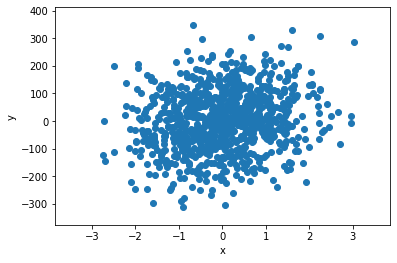

In [287]:
from sklearn.datasets import make_regression
import matplotlib.pyplot as plt
import numpy as np

X, y = make_regression(n_samples=912, n_features=4, n_informative=11, n_targets=1)

n_samples=912

plt.figure()

min_x = np.min(X)
max_x = np.max(X)
diff_x = max_x - min_x

min_y = np.min(y)
max_y = np.max(y)
diff_y = max_y - min_y

plt.xlim(min_x - 0.1 * diff_x, max_x + 0.1 * diff_x)
plt.ylim(min_y - 0.1 * diff_y, max_y + 0.1 * diff_y)

plt.xlabel('x')
plt.ylabel('y')

plt.scatter(X[:,0], y)

In [288]:
n,m = X.shape
x0 = np.ones((n,1))
stack = np.hstack((x0, X))

# beta = ((X^t * X)^-1 * X^t) * y
beta = np.dot(np.dot(np.linalg.inv(np.dot(np.transpose(stack), stack)), np.transpose(stack)), y)
beta

array([-5.55111512e-16,  1.00665105e+01,  8.21094176e+01,  4.81188554e+01,
        5.26951010e+01])

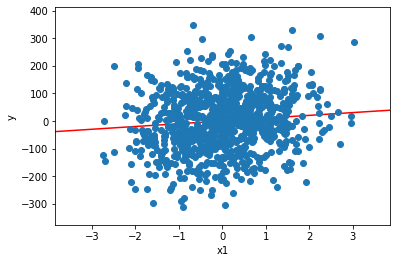

In [289]:
plt.figure()

min_x = np.min(X)
max_x = np.max(X)
diff_x = max_x - min_x

min_y = np.min(y)
max_y = np.max(y)
diff_y = max_y - min_y

plt.xlim(min_x - 0.1 * diff_x, max_x + 0.1 * diff_x)
plt.ylim(min_y - 0.1 * diff_y, max_y + 0.1 * diff_y)

plt.xlabel('x1')
plt.ylabel('y')

plt.scatter(X[:,0], y, zorder=10)

line = np.linspace(min_x - 0.1 * diff_x, max_x + 0.1 * diff_x)
plt.plot(line, beta[0] + beta[1] * line, c='red')


In [290]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import Ridge
from sklearn.metrics import mean_absolute_error, mean_squared_error

ridge1 = Ridge(alpha=1.0).fit(X_train, y_train)
y_pred = ridge1.predict(X_train)
print("MAE: ", mean_absolute_error(y_train, y_pred))
print("MSE: ", mean_squared_error(y_train, y_pred))
print("R2: ", ridge1.score(X_train, y_train))

ridge5 = Ridge(alpha=5.0).fit(X_train, y_train)
y_pred = ridge5.predict(X_train)
print("MAE: ", mean_absolute_error(y_train, y_pred))
print("MSE: ", mean_squared_error(y_train, y_pred))
print("R2: ", ridge5.score(X_train, y_train))

ridge10 = Ridge(alpha=10.0).fit(X_train, y_train)
y_pred = ridge10.predict(X_train)
print("MAE: ", mean_absolute_error(y_train, y_pred))
print("MSE: ", mean_squared_error(y_train, y_pred))
print("R2: ", ridge10.score(X_train, y_train))

ridge15 = Ridge(alpha=15.0).fit(X_train, y_train)
y_pred = ridge15.predict(X_train)
print("MAE: ", mean_absolute_error(y_train, y_pred))
print("MSE: ", mean_squared_error(y_train, y_pred))
print("R2: ", ridge15.score(X_train, y_train))



MAE:  315.8507760742898
MSE:  195929.34592678654
R2:  0.6058629284082087
MAE:  315.70685841077477
MSE:  195938.1661438636
R2:  0.6058451854074696
MAE:  315.53868172438337
MSE:  195964.8735551151
R2:  0.6057914600157439
MAE:  315.4164438504895
MSE:  196007.89723956832
R2:  0.6057049123425546


train split probar mae con x_train y_train y con x_test y_test para ver si hay overfitting, el mae de train sera menor que el mae de test, si hay muchos ordenes de magnitud de diferencia puede haber overfitting, si la diferencia el de decenas o centenas no sabemos nada. 

Validación cruzada cv=5 => 5 maes de train y 5 maes de test. Si los errores son muy diferentes entre ellos puede haber

Error cercano a 0 en train te puede estar diciendo que hay overfitting



Terminamos el entrenamiento del modelo y hacemos el pipeline para subir la submission

In [292]:
test_dataframe= pd.read_csv("https://raw.githubusercontent.com/rodrigotorresp/Practica-Regresi-n-ML/main/test.csv");
test_dataframe;
test_dataframe['Weight'] = test_dataframe['Weight'].str.replace('kg$', '')

test_dataframe['CPU2'] = test_dataframe['Cpu'].str.replace('\s', '-')
cpu = test_dataframe['CPU2'].str.split('[-]',expand=True)

test_dataframe=pd.concat([test_dataframe, cpu], axis=1)

test_dataframe['ScreenResolution2'] = test_dataframe['ScreenResolution'].str.replace('\s', '@')
cpu = test_dataframe['ScreenResolution2'].str.split('[@]',expand=True)

train_dataframe3=pd.concat([train_dataframe3,cpu], axis=1)
import sklearn.compose
colum_transformer = sklearn.compose.ColumnTransformer(transformers=[
    ("Laptop Id" , "drop", [0]),
    ("Company" , "drop", [1]),
    ("Product" , "drop", [2]),
    ("TypeName" , sklearn.preprocessing.OrdinalEncoder(categories=[['Netbook', 'Notebook', 'Ultrabook','Gaming','2 in 1 Convertible','Workstation']]), [3]),
    ("Inches" , "passthrough", [4]),
    ("ScreenResolution" , "drop", [5]),
    ("CPU" , "drop", [6]),
    ("RAM" , sklearn.preprocessing.OrdinalEncoder(categories=[['2GB', '4GB','6GB','8GB','12GB','16GB','24GB','32GB' ,'64GB']]), [7]),
    ("Memory" , "drop", [8]),
    ("GPU" , "drop", [9]),
    ("OPSYS" , sklearn.preprocessing.OrdinalEncoder(categories=[[ 'No OS', 'Android' , 'Chrome OS' , 'Windows 7','Linux','Windows 10','macOS','Windows 10 S','Mac OS X']]), [10]),
    ("Weight" , "passthrough", [11]),
    ("Price" , "drop", [12]),
    ("CPU2", "drop", [13]),
    ("INTEL/AMD", "drop", [14]),
    ("1", "drop", [15]),
    ("2", "drop", [16]),
    ("3", "drop", [17]),
    ("4", "drop", [18]),
    ("5", "drop", [19]),


    ]);
test_dataframe_transform = colum_transformer.fit_transform(test_dataframe);

colum_transformer_Scaler = sklearn.compose.ColumnTransformer(transformers=[
    ("TypeNameScaler" , sklearn.preprocessing.StandardScaler(), [0]),
    ("InchesScaler" , sklearn.preprocessing.StandardScaler(), [1]),
    ("RAMScaler" , sklearn.preprocessing.StandardScaler(), [2]),
    ("WeightScaler" , sklearn.preprocessing.StandardScaler(), [4]),
    ("OPSYSScaler" , sklearn.preprocessing.StandardScaler(), [3]),
    ]);

test_dataframe_transform = colum_transformer_Scaler.fit_transform(test_dataframe_transform);

y_test = ridge15.predict(test_dataframe_transform);

compression_opts = dict(method='zip',
                        archive_name='Submission.csv')

submissionDataFrame = pd.DataFrame({"LaptopId": test_dataframe.LaptopId, "price": y_test});
submissionDataFrame.to_csv("Submission.zip", index=False, compression=compression_opts);


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: FutureWarning: The default value of regex will change from True to False in a future version.
  This is separate from the ipykernel package so we can avoid doing imports until
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:5: FutureWarning: The default value of regex will change from True to False in a future version.
  """
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:10: FutureWarning: The default value of regex will change from True to False in a future version.
  # Remove the CWD from sys.path while we load stuff.
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:1692: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.
  FutureWarning,


Hicimos submission de las regresiones lineales con diferentes hiper-parámetros alpha quedandonos con un error de 1091.80529 en el mejor de los casos con alpha = 1.0. Por ello desechamos este modelo

Intentamos otros modelos

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:34: UserWarning: With alpha=0, this algorithm does not converge well. You are advised to use the LinearRegression estimator
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_coordinate_descent.py:648: UserWarning: Coordinate descent with no regularization may lead to unexpected results and is discouraged.
  coef_, l1_reg, l2_reg, X, y, max_iter, tol, rng, random, positive


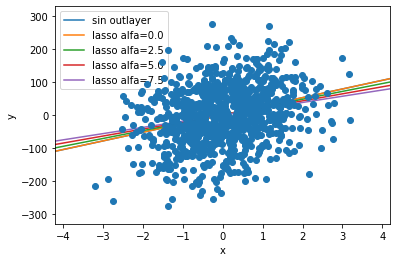

In [ ]:
##Lasso
from sklearn.linear_model import Lasso

# configuración del gráfico
plt.figure()

n_samples=912

min_x = np.min(X)
max_x = np.max(X)
diff_x = max_x - min_x

min_y = np.min(y)
max_y = np.max(y)
diff_y = max_y - min_y

plt.xlim(min_x - 0.1 * diff_x, max_x + 0.1 * diff_x)
plt.ylim(min_y - 0.1 * diff_y, max_y + 0.1 * diff_y)

plt.xlabel('x')
plt.ylabel('y')

# muestras
plt.scatter(X[:n_samples,0], y[:n_samples], zorder=10)
plt.scatter(X[n_samples:,0], y[n_samples:], zorder=10)

# regresion sin outlayers
reg = LinearRegression().fit(X[:n_samples,:], y[:n_samples])
line = np.linspace(min_x - 0.1 * diff_x, max_x + 0.1 * diff_x)
plt.plot(line, reg.intercept_ + reg.coef_[0] * line, label="sin outlayer")

# regresion con outlayers
for alpha in np.arange(0,10,2.5):
    lasso = Lasso(alpha=alpha).fit(X, y)
    line = np.linspace(min_x - 0.1 * diff_x, max_x + 0.1 * diff_x)
    plt.plot(line, lasso.intercept_ + lasso.coef_[0] * line, label="lasso alfa=" + str(alpha))

# mostrar el gráfico
plt.legend()
plt.show()

In [ ]:
lasso = Lasso(alpha=0).fit(X_train,y_train)
y_pred = lasso.predict(X_train)
print("MAE: ", mean_absolute_error(y_train, y_pred))
print("MSE: ", mean_squared_error(y_train, y_pred))
print("R2: ", lasso.score(X_train, y_train))

lasso2 = Lasso(alpha=2.5).fit(X_train,y_train)
y_pred = lasso.predict(X_train)
print("MAE: ", mean_absolute_error(y_train, y_pred))
print("MSE: ", mean_squared_error(y_train, y_pred))
print("R2: ", lasso2.score(X_train, y_train))

lasso5 = Lasso(alpha=5.0).fit(X_train,y_train)
y_pred = lasso.predict(X_train)
print("MAE: ", mean_absolute_error(y_train, y_pred))
print("MSE: ", mean_squared_error(y_train, y_pred))
print("R2: ", lasso5.score(X_train, y_train))

lasso7 = Lasso(alpha=7.5).fit(X_train,y_train)
y_pred = lasso.predict(X_train)
print("MAE: ", mean_absolute_error(y_train, y_pred))
print("MSE: ", mean_squared_error(y_train, y_pred))
print("R2: ", lasso7.score(X_train, y_train))

MAE:  318.46392117103034
MSE:  197734.37352599515
R2:  0.6022318833050402
MAE:  318.46392117103034
MSE:  197734.37352599515
R2:  0.6020788857313166
MAE:  318.46392117103034
MSE:  197734.37352599515
R2:  0.6016231059958436
MAE:  318.46392117103034
MSE:  197734.37352599515
R2:  0.600863549127605


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: UserWarning: With alpha=0, this algorithm does not converge well. You are advised to use the LinearRegression estimator
  """Entry point for launching an IPython kernel.
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_coordinate_descent.py:648: UserWarning: Coordinate descent with no regularization may lead to unexpected results and is discouraged.
  coef_, l1_reg, l2_reg, X, y, max_iter, tol, rng, random, positive
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_coordinate_descent.py:648: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 9.017e+07, tolerance: 4.534e+04 Linear regression models with null weight for the l1 regularization term are more efficiently fitted using one of the solvers implemented in sklearn.linear_model.Ridge/RidgeCV instead.
  coef_, l1_re

La regularización con Lasso tampoco arrojaba mucha luz puesto que en el mejor de los casos teníamos una puntuación en el kaggle de 1094.40252

TypeError: ignored

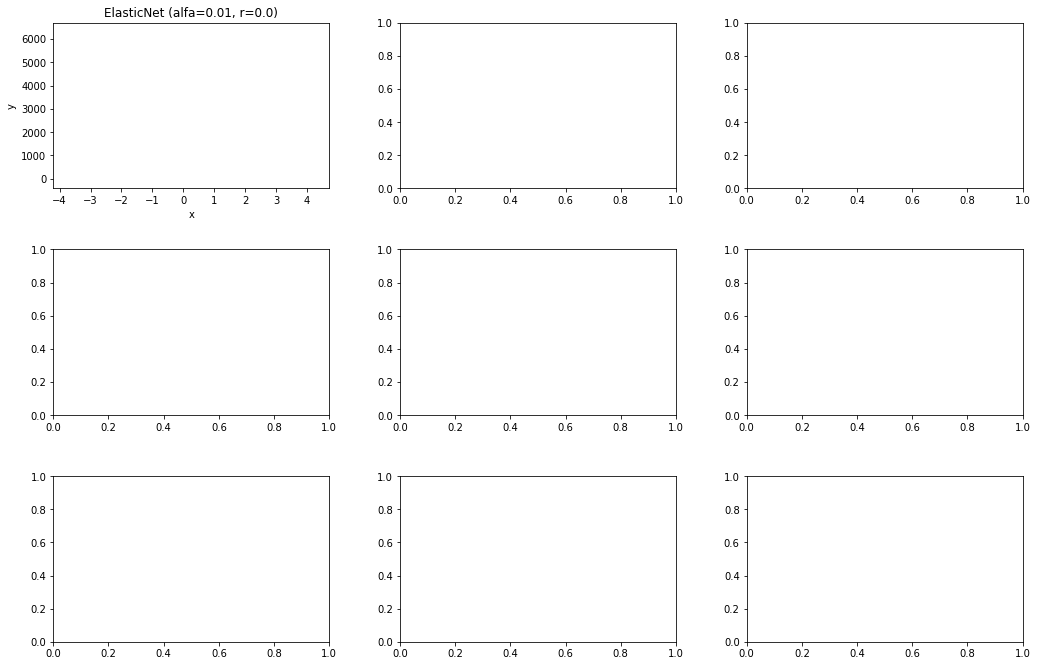

In [107]:
from sklearn.linear_model import ElasticNet

min_x = np.min(X)
max_x = np.max(X)
diff_x = max_x - min_x

min_y = np.min(y)
max_y = np.max(y)
diff_y = max_y - min_y

def plot_regression(ax, alpha, r):
    
    ax.set_xlim(min_x - 0.1 * diff_x, max_x + 0.1 * diff_x)
    ax.set_ylim(min_y - 0.1 * diff_y, max_y + 0.1 * diff_y)

    ax.set_title('ElasticNet (alfa=' + str(alpha) + ', r=' + str(r) + ')')
    ax.set_xlabel('x')
    ax.set_ylabel('y')
    
    # muestras
    ax.scatter(X[:n_samples,0], y[:n_samples], zorder=10)
    ax.scatter(X[n_samples:,0], y[n_samples:], zorder=10)
    
    # regresion sin outlayers
    reg = LinearRegression().fit(X[:n_samples,:], y[:n_samples])
    line = np.linspace(min_x - 0.1 * diff_x, max_x + 0.1 * diff_x)
    ax.plot(line, reg.intercept_ + reg.coef_[0] * line, c="green")

    # elastic net
    elastic = ElasticNet(alpha=alpha, l1_ratio=r).fit(X, y)
    line = np.linspace(min_x - 0.1 * diff_x, max_x + 0.1 * diff_x)
    ax.plot(line, elastic.intercept_ + elastic.coef_[0] * line, c="red")
    

fig, axs = plt.subplots(nrows=3, ncols=3, figsize=(15,10))
fig.tight_layout(pad=4.0)

plot_regression(axs[0][0], 0.01, 0.0)
plot_regression(axs[0][1], 0.01, 0.5)
plot_regression(axs[0][2], 0.01, 1.0)

plot_regression(axs[1][0], 5, 0.0)
plot_regression(axs[1][1], 5, 0.5)
plot_regression(axs[1][2], 5, 1.0)

plot_regression(axs[2][0], 10, 0.0)
plot_regression(axs[2][1], 10, 0.5)
plot_regression(axs[2][2], 10, 1.0)

Las gráficas no arrojan mucha luz y por lo tanto desechamos este modelo

In [ ]:
from sklearn.neighbors import KNeighborsRegressor
knn = KNeighborsRegressor(n_neighbors=10, weights='uniform').fit(X_train, y_train)

y_pred = knn.predict(X_train)
print("MAE: ", mean_absolute_error(y_train, y_pred))
print("MSE: ", mean_squared_error(y_train, y_pred))
print("R2: ", knn.score(X_train, y_train))

MAE:  232.5023355263158
MSE:  125544.02387149341
R2:  0.74745205374671


In [ ]:
from sklearn.preprocessing import PolynomialFeatures

poly_X = PolynomialFeatures(degree=2, include_bias=False).fit_transform(train_dataframe_transform)
poly_X

array([[ 1.    , 13.3   ,  1.    , ...,  1.    ,  1.2   ,  1.44  ],
       [ 2.    , 13.3   ,  3.    , ...,  9.    ,  3.33  ,  1.2321],
       [ 1.    , 15.6   ,  3.    , ...,  9.    ,  6.06  ,  4.0804],
       ...,
       [ 1.    , 15.6   ,  5.    , ..., 25.    , 11.6   ,  5.3824],
       [ 1.    , 15.6   ,  3.    , ...,  9.    ,  6.6   ,  4.84  ],
       [ 1.    , 14.    ,  3.    , ...,  9.    ,  5.61  ,  3.4969]])

In [242]:
from sklearn import tree
tree = tree.DecisionTreeRegressor()
tree = tree.fit(X_train, y_train)
y_pred = tree.predict(X_train)

print("MAE: ", mean_absolute_error(y_train, y_pred))
print("MSE: ", mean_squared_error(y_train, y_pred))
print("R2: ", tree.score(X_train, y_train))


MAE:  220.28346893519475
MSE:  109273.09152475234
R2:  0.7801831262508209


ValueError: ignored

In [ ]:
from sklearn import linear_model

Bayes = linear_model.BayesianRidge()
Bayes.fit(X_train, y_train)
y_pred = Bayes.predict(X_train)

print("MAE: ", mean_absolute_error(y_train, y_pred))
print("MSE: ", mean_squared_error(y_train, y_pred))
print("R2: ", Bayes.score(X_train, y_train))

MAE:  318.345522709371
MSE:  197737.9387359835
R2:  0.6022247114267401
